<a href="https://colab.research.google.com/github/cord14/projeto-DL/blob/main/Feature_extraction_com_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from numpy.random import seed
seed(14)

In [55]:
import tensorflow
tensorflow.random.set_seed(27)

In [1]:
#Importando as bibliotecas
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras import layers
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
import os
import shutil
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove

In [2]:
#Importando o dataset
esq_dir=('/content/drive/MyDrive/Dataset_VGG/11(esq)')
dir_dir=('/content/drive/MyDrive/Dataset_VGG/21(dir)')
esq=os.listdir(esq_dir)
dir=os.listdir(dir_dir)
teste_esq_dir=('/content/drive/MyDrive/Dataset_VGG/teste 11(esq)')
teste_dir_dir=('/content/drive/MyDrive/Dataset_VGG/teste 21(dir)')
esq=os.listdir(esq_dir)
dir=os.listdir(dir_dir)
tds=esq+dir
teste_esq=os.listdir(teste_esq_dir)
teste_dir=os.listdir(teste_dir_dir)
tds_teste=teste_esq+teste_dir
print (len(tds),len(tds_teste))
print(teste_dir)

2753 1584
['S06_Cz_21_1.png', 'S06_Cz_21_2.png', 'S06_Cz_21_0.png', 'S06_Cz_21_3.png', 'S06_Cz_21_5.png', 'S06_Cz_21_6.png', 'S06_Cz_21_4.png', 'S06_Cz_21_8.png', 'S06_Cz_21_7.png', 'S06_Cz_21_10.png', 'S06_Cz_21_9.png', 'S06_Cz_21_12.png', 'S06_Cz_21_11.png', 'S06_Cz_21_13.png', 'S06_Cz_21_14.png', 'S06_Cz_21_16.png', 'S06_Cz_21_15.png', 'S06_Cz_21_17.png', 'S06_Cz_21_18.png', 'S06_Cz_21_19.png', 'S06_Cz_21_20.png', 'S06_Cz_21_21.png', 'S06_Cz_21_22.png', 'S06_Cz_21_23.png', 'S06_Cz_21_24.png', 'S06_Cz_21_26.png', 'S06_Cz_21_25.png', 'S06_Cz_21_27.png', 'S06_Cz_21_28.png', 'S06_Cz_21_29.png', 'S06_Cz_21_30.png', 'S06_Cz_21_31.png', 'S06_Cz_21_32.png', 'S06_Cz_21_33.png', 'S06_Cz_21_34.png', 'S06_C1_21_0.png', 'S06_C1_21_1.png', 'S06_C1_21_5.png', 'S06_C1_21_3.png', 'S06_C1_21_4.png', 'S06_C1_21_2.png', 'S06_C1_21_6.png', 'S06_C1_21_7.png', 'S06_C1_21_9.png', 'S06_C1_21_8.png', 'S06_C1_21_10.png', 'S06_C1_21_11.png', 'S06_C1_21_12.png', 'S06_C1_21_13.png', 'S06_C1_21_14.png', 'S06_C1_2

In [3]:
print (len(esq),len(dir),len(teste_esq),len(teste_dir))

1346 1407 801 783


In [4]:
y_feat=[]
for i in esq:
  y_feat.append(0)
for i in dir:
  y_feat.append(1)
print (y_feat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [5]:
y_test=[]
for i in teste_esq:
  y_test.append(0)
for i in teste_dir:
  y_test.append(1)
print (y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [7]:
#preparando e visualizando modelo 
model=VGG16(weights='imagenet', include_top=False, pooling="max")
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [ ]:
#feature extrarion
list_feat=[]
for i in esq:
  img_path = "/content/drive/MyDrive/Dataset_VGG/11(esq)/" + i 
  img = image.load_img(img_path, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  vgg16_feature = model.predict(img_data)
  #tf.keras.layers.GlobalMaxPooling2D()(vgg16_feature)
  vgg16_feature_np = np.array(vgg16_feature)
  list_feat.append(vgg16_feature_np.flatten())
for i in dir:
  img_path = "/content/drive/MyDrive/Dataset_VGG/21(dir)/" + i 
  img = image.load_img(img_path, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)

  vgg16_feature = model.predict(img_data)
  #tf.keras.layers.GlobalMaxPooling2D()(vgg16_feature)
  vgg16_feature_np = np.array(vgg16_feature)
  list_feat.append(vgg16_feature_np.flatten())
  list_feat_np = np.array(list_feat)


In [8]:
x_test=[]
for i in teste_esq:
  img_path = "/content/drive/MyDrive/Dataset_VGG/teste 11(esq)/" + i 
  img = image.load_img(img_path, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  vgg16_feature = model.predict(img_data)
  vgg16_feature_np = np.array(vgg16_feature)
  x_test.append(vgg16_feature_np.flatten())

In [9]:

for i in teste_dir:
  img_path = "/content/drive/MyDrive/Dataset_VGG/teste 21(dir)/" + i 
  img = image.load_img(img_path, target_size=(224, 224))
  img_data = image.img_to_array(img)
  img_data = np.expand_dims(img_data, axis=0)
  img_data = preprocess_input(img_data)
  vgg16_feature = model.predict(img_data)
  vgg16_feature_np = np.array(vgg16_feature)
  x_test.append(vgg16_feature_np.flatten())

In [10]:
x_test_np=np.array(x_test)

In [ ]:
np.save("feats_512.npy",list_feat_np)

In [11]:
np.save('teste_feats.npy',x_test_np)

In [6]:
feats_512 = np.load('/content/drive/MyDrive/feats_512.npy')
teste_feat=np.load('/content/drive/MyDrive/teste_feats.npy')

FileNotFoundError: ignored

In [12]:
print (x_test_np)

[[ 0.         0.         0.        ...  0.        12.758999   4.544591 ]
 [ 0.         0.         0.        ...  0.         4.8690076  0.       ]
 [ 0.         0.         0.        ...  0.         6.6625977  0.       ]
 ...
 [ 0.         0.         0.        ...  0.        14.985071   7.4079504]
 [ 0.         0.         0.        ...  0.        19.283693   0.       ]
 [ 0.         0.         0.        ...  0.        20.054987   9.813231 ]]


In [13]:
y_feat=np.array(y_feat)
print (y_feat)

[0 0 0 ... 1 1 1]


In [14]:
y_test=np.array(y_test)

In [68]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [67]:
#montando o neuronio
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(512,),activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='mse',metrics=['accuracy'])
model.fit(feats_512, y_feat, batch_size=128, epochs=320, validation_data=(x_test_np,y_test))

Epoch 1/320
22/22 [==============================] - 0s 6ms/step - loss: 0.5099 - accuracy: 0.4875 - val_loss: 0.4937 - val_accuracy: 0.5063
Epoch 2/320
22/22 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.4896 - val_loss: 0.4962 - val_accuracy: 0.4735
Epoch 3/320
22/22 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.4965 - val_loss: 0.4777 - val_accuracy: 0.4912
Epoch 4/320
22/22 [==============================] - 0s 3ms/step - loss: 0.4595 - accuracy: 0.4936 - val_loss: 0.4729 - val_accuracy: 0.4880
Epoch 5/320
22/22 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.5045 - val_loss: 0.4776 - val_accuracy: 0.4874
Epoch 6/320
22/22 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.5187 - val_loss: 0.4699 - val_accuracy: 0.4931
Epoch 7/320
22/22 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.5245 - val_loss: 0.4805 - val_accuracy: 0.4817
Epoch 8/320
2

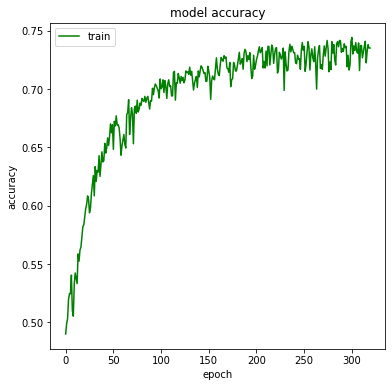

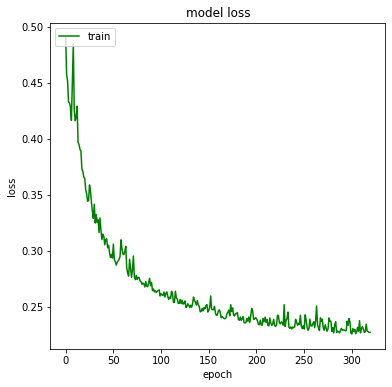

In [43]:
import matplotlib.pyplot as plt
#print(history.history.keys())
plt.figure(figsize=(6,6))

plt.plot(model.history.history['accuracy'],"g")

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(6,6))
plt.plot(model.history.history['loss'], 'g')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
model.fit(x_test_np, y_test, batch_size=1, epochs=20, validation_split=0.0)

Epoch 1/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5062 - accuracy: 0.4931
Epoch 2/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.4943
Epoch 3/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.4943
Epoch 4/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.4943
Epoch 5/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.4943
Epoch 6/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.4943
Epoch 7/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.4943
Epoch 8/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.4943
Epoch 9/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.5057 - accuracy: 0.4943
Epoch 10/20
1584/1584 [==============================] - 2s 1ms/step - loss: 0.505

In [ ]:
model.evaluate(x_test_np,batch_size=5)

317/317 [==============================] - 0s 862us/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [ ]:
import matplotlib.pyplot as plt
#print(history.history.keys())
plt.figure(figsize=(15,15))

plt.plot(model.history.history['accuracy'],"b")

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.figure(figsize=(15,15))
plt.plot(model.history.history['loss'], 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(feats_512)

5

TRAIN: [ 551  552  553 ... 2750 2751 2752] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

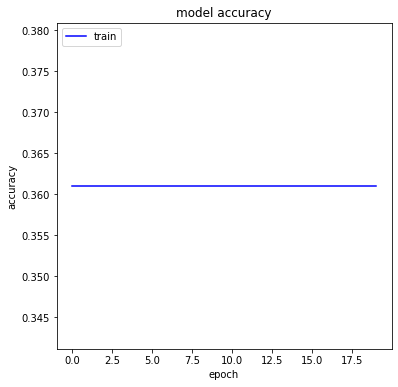

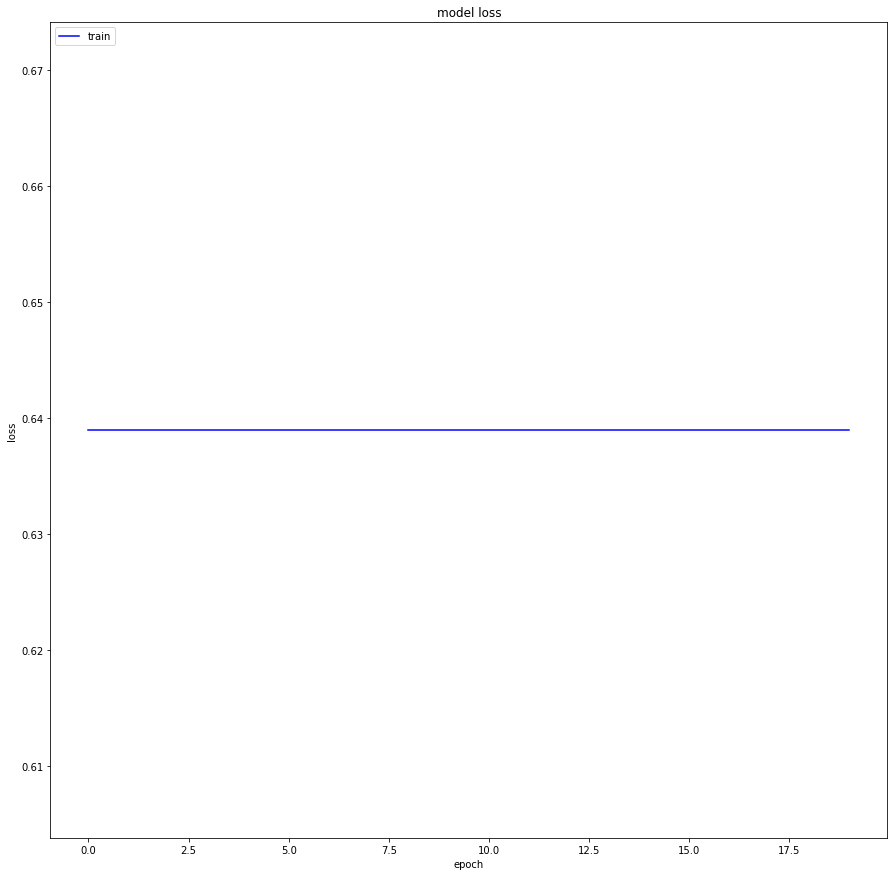

TRAIN: [   0    1    2 ... 2750 2751 2752] TEST: [ 551  552  553  554  555  556  557  558  559  560  561  562  563  564
  565  566  567  568  569  570  571  572  573  574  575  576  577  578
  579  580  581  582  583  584  585  586  587  588  589  590  591  592
  593  594  595  596  597  598  599  600  601  602  603  604  605  606
  607  608  609  610  611  612  613  614  615  616  617  618  619  620
  621  622  623  624  625  626  627  628  629  630  631  632  633  634
  635  636  637  638  639  640  641  642  643  644  645  646  647  648
  649  650  651  652  653  654  655  656  657  658  659  660  661  662
  663  664  665  666  667  668  669  670  671  672  673  674  675  676
  677  678  679  680  681  682  683  684  685  686  687  688  689  690
  691  692  693  694  695  696  697  698  699  700  701  702  703  704
  705  706  707  708  709  710  711  712  713  714  715  716  717  718
  719  720  721  722  723  724  725  726  727  728  729  730  731  732
  733  734  735  736  737  7

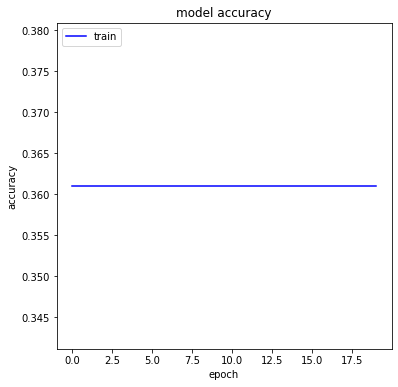

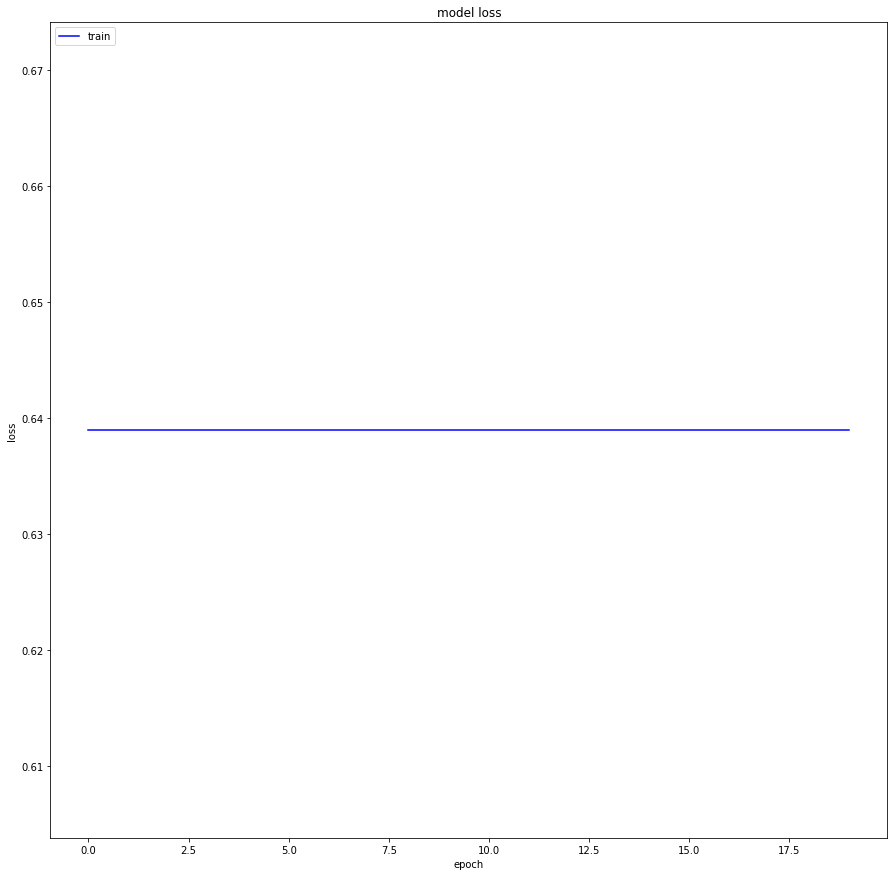

TRAIN: [   0    1    2 ... 2750 2751 2752] TEST: [1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114 1115
 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129
 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143
 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157
 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171
 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185
 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199
 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213
 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227
 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241
 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255
 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269
 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1282 1283
 1284 1285 1286 1287 1288 12

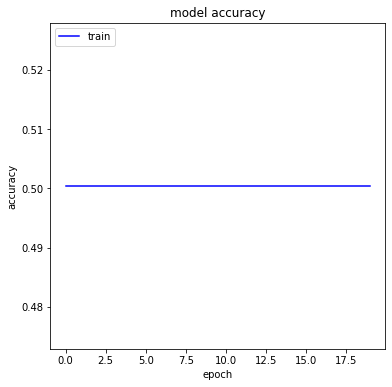

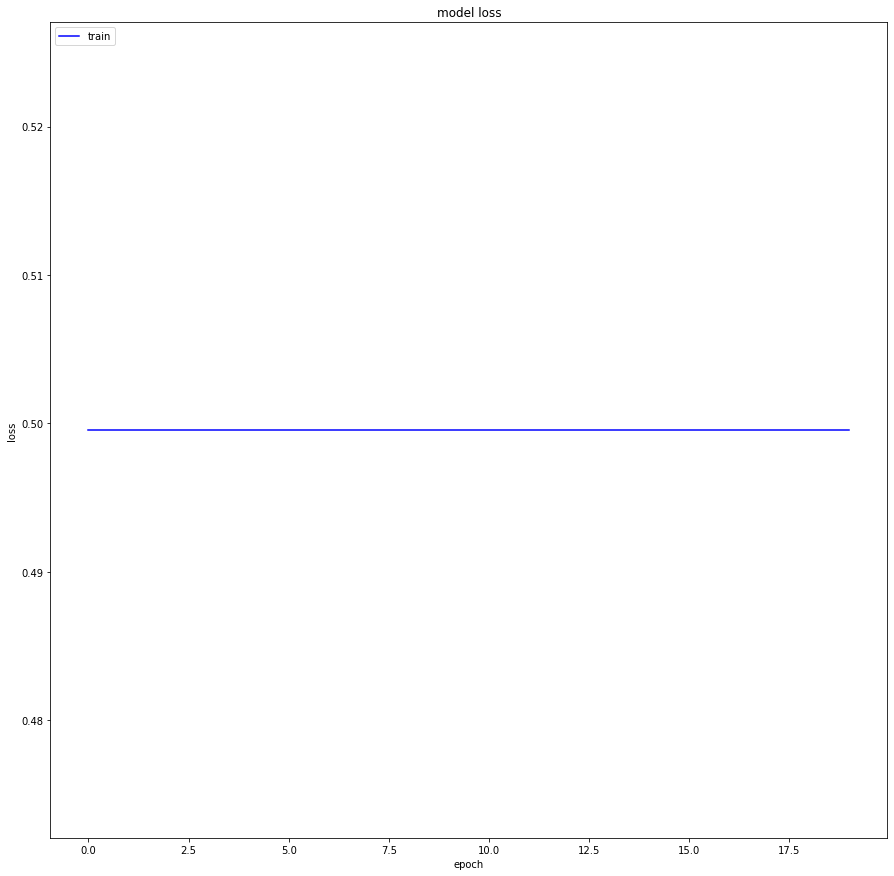

TRAIN: [   0    1    2 ... 2750 2751 2752] TEST: [1653 1654 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666
 1667 1668 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680
 1681 1682 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694
 1695 1696 1697 1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1708
 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722
 1723 1724 1725 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736
 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750
 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764
 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778
 1779 1780 1781 1782 1783 1784 1785 1786 1787 1788 1789 1790 1791 1792
 1793 1794 1795 1796 1797 1798 1799 1800 1801 1802 1803 1804 1805 1806
 1807 1808 1809 1810 1811 1812 1813 1814 1815 1816 1817 1818 1819 1820
 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831 1832 1833 1834
 1835 1836 1837 1838 1839 18

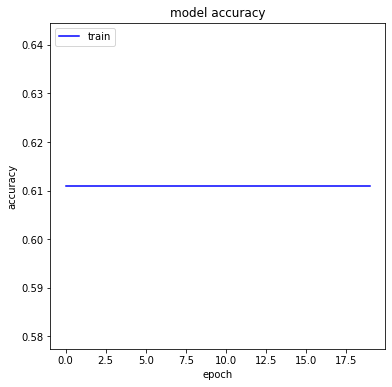

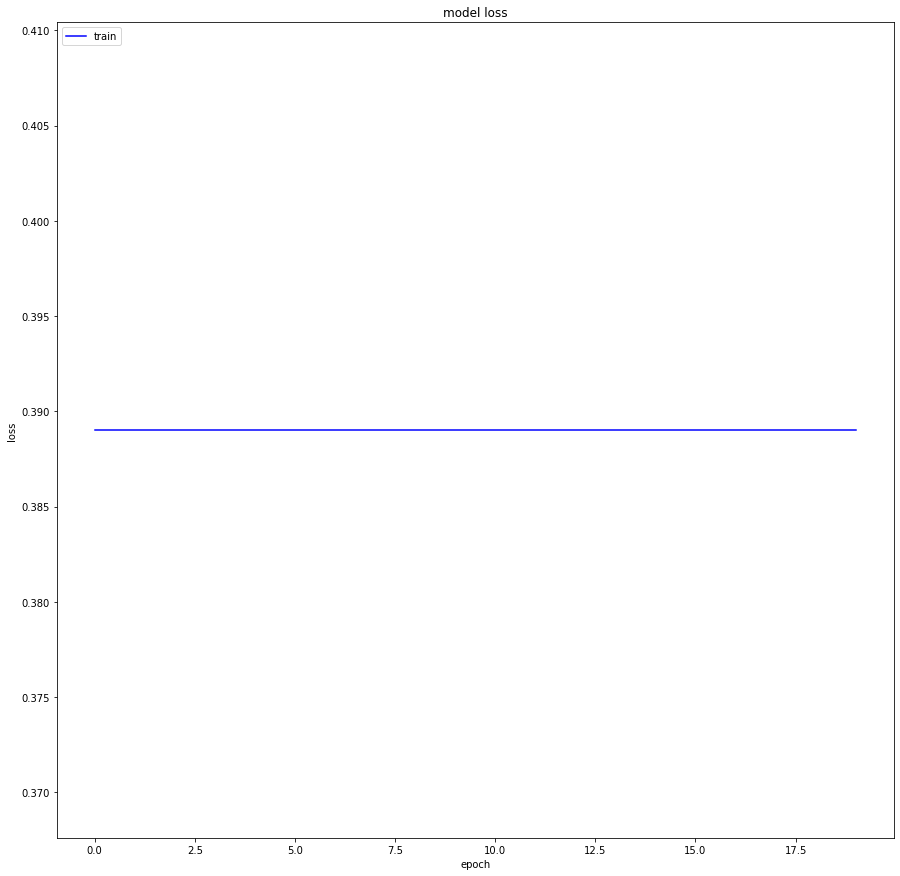

TRAIN: [   0    1    2 ... 2200 2201 2202] TEST: [2203 2204 2205 2206 2207 2208 2209 2210 2211 2212 2213 2214 2215 2216
 2217 2218 2219 2220 2221 2222 2223 2224 2225 2226 2227 2228 2229 2230
 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244
 2245 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258
 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268 2269 2270 2271 2272
 2273 2274 2275 2276 2277 2278 2279 2280 2281 2282 2283 2284 2285 2286
 2287 2288 2289 2290 2291 2292 2293 2294 2295 2296 2297 2298 2299 2300
 2301 2302 2303 2304 2305 2306 2307 2308 2309 2310 2311 2312 2313 2314
 2315 2316 2317 2318 2319 2320 2321 2322 2323 2324 2325 2326 2327 2328
 2329 2330 2331 2332 2333 2334 2335 2336 2337 2338 2339 2340 2341 2342
 2343 2344 2345 2346 2347 2348 2349 2350 2351 2352 2353 2354 2355 2356
 2357 2358 2359 2360 2361 2362 2363 2364 2365 2366 2367 2368 2369 2370
 2371 2372 2373 2374 2375 2376 2377 2378 2379 2380 2381 2382 2383 2384
 2385 2386 2387 2388 2389 23

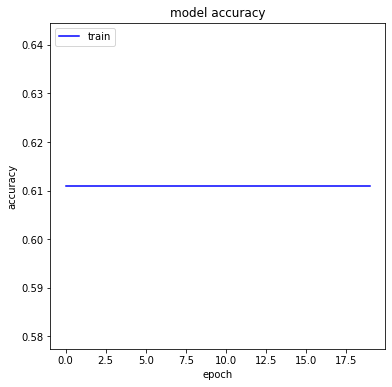

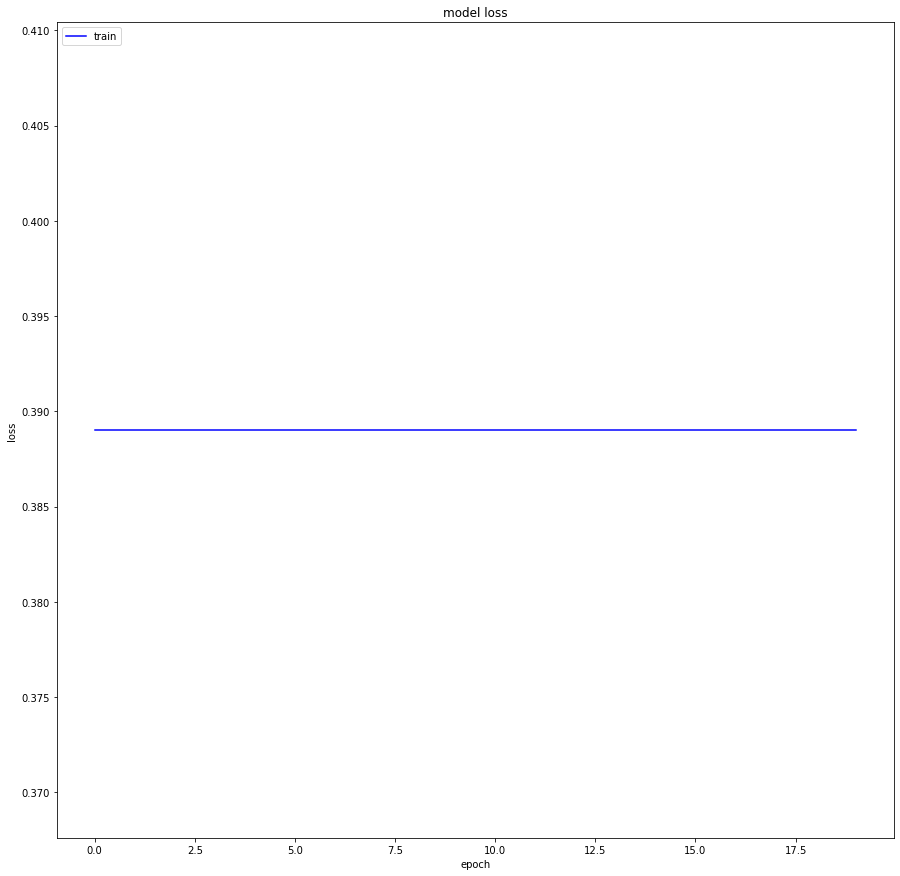

In [ ]:
for train_index, test_index in kf.split(feats_512,y_feat):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = feats_512[train_index], feats_512[test_index]
    y_train, y_test = y_feat[train_index], y_feat[test_index]
    model.fit(X_train, y_train, batch_size=128, epochs=160, validation_split=0.0)
    plt.figure(figsize=(6,6))

    plt.plot(model.history.history['accuracy'],"b")

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    plt.figure(figsize=(6,6))
    plt.plot(model.history.history['loss'], 'b')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()